# Medical Cost Personal Insurance Project

Project Description
Health insurance is a type of insurance that covers medical expenses that arise due to
an illness. These expenses could be related to hospitalisation costs, cost of medicines
or doctor consultation fees. The main purpose of medical insurance is to receive the
best medical care without any strain on your finances. Health insurance plans offer
protection against high medical costs. It covers hospitalization expenses, day care
procedures, domiciliary expenses, and ambulance charges, besides many others.
Based on certain input features such as age , bmi,,no of dependents ,smoker ,region
medical insurance is calculated .
Columns
age: age of primary beneficiary
sex: insurance contractor gender, female, male
bmi: Body mass index, providing an understanding of body, weights that are
relatively high or low relative to height, objective index of body weight (kg / m ^ 2)
using the ratio of height to weight, ideally 18.5 to 24.9.
children: Number of children covered by health insurance / Number of
dependents
smoker: Smoking
region: the beneficiary&#39;s residential area in the US, northeast, southeast,
southwest, northwest.
charges: Individual medical costs billed by health insurance

Predict : Can you accurately predict insurance costs?


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
import warnings
warnings.filterwarnings('ignore')

In [12]:
data = pd.read_csv('medical_cost_insurance.csv')

In [13]:
data.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [14]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [15]:
data.shape

(1338, 7)

In [16]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [17]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [18]:
data.isna()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [19]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Axes: >

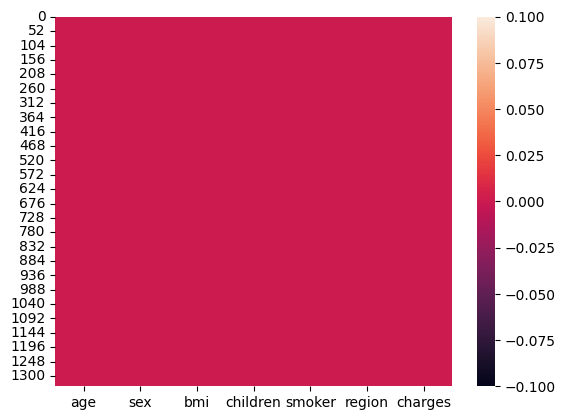

In [20]:
sns.heatmap(data.isna()) 

In [21]:
# Convert categorical variables into numbers using LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
data['sex'] = label_encoder.fit_transform(data['sex'])
data['smoker'] = label_encoder.fit_transform(data['smoker'])
data['region'] = label_encoder.fit_transform(data['region'])

In [22]:
data.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,3,16884.9240
1,18,1,33.77,1,0,2,1725.5523


In [23]:
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


Obervation

The mean age of individuals is approximately 39 years, with a roughly equal distribution of males (50.5%) and females (49.5%).

The average BMI (Body Mass Index) is around 30.66, with a standard deviation of approximately 6.10,

indicating some variability in weight status among the individuals in the dataset.

In [24]:
data.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

In [25]:
data.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


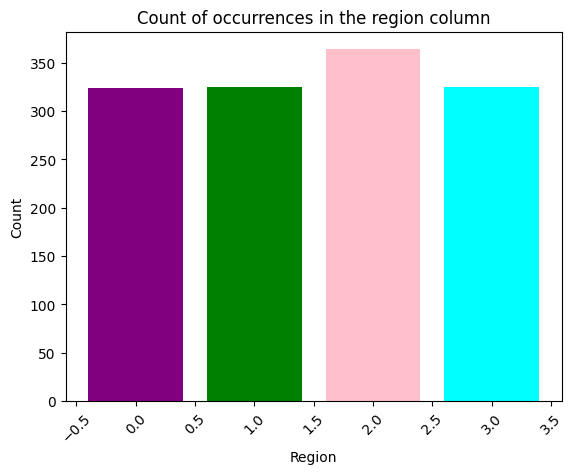

In [26]:
region_counts = data['region'].value_counts()
# Generate a color map
colors = ['pink','cyan','green','purple']

plt.bar(region_counts.index, region_counts.values, color=colors)
plt.title('Count of occurrences in the region column')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

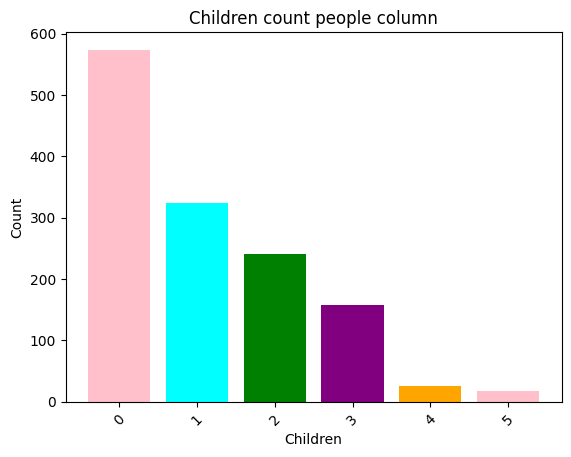

In [27]:
import matplotlib.pyplot as plt

# Count occurrences of each category in the 'children' column
Children_counts = data['children'].value_counts()

# Generate a color map
colors = ['pink', 'cyan', 'green', 'purple','orange']

# Plot the count of occurrences with specified colors for each bar
plt.bar(Children_counts.index, Children_counts.values, color=colors)
plt.title('Children count people column')
plt.xlabel('Children')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

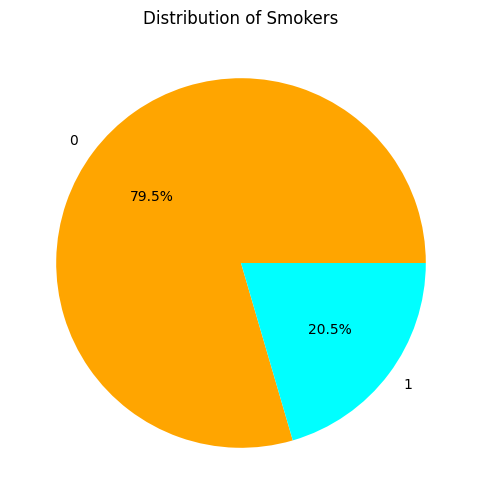

In [28]:
import matplotlib.pyplot as plt

# Count occurrences of each category in the 'smoker' column
smoker_counts = data['smoker'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 6))
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%', colors=['orange', 'cyan'])
plt.title('Distribution of Smokers')
plt.show()

<Axes: >

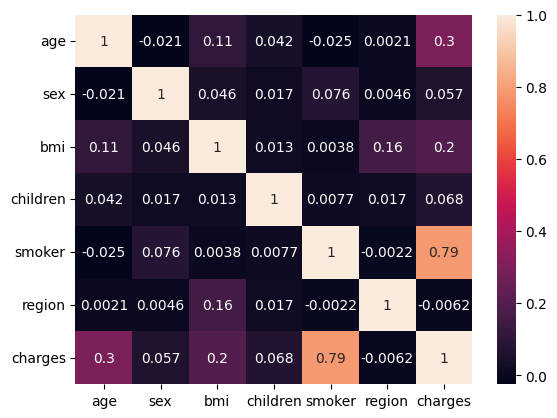

In [29]:
sns.heatmap(data.corr(),annot=True)

<Figure size 600x600 with 0 Axes>

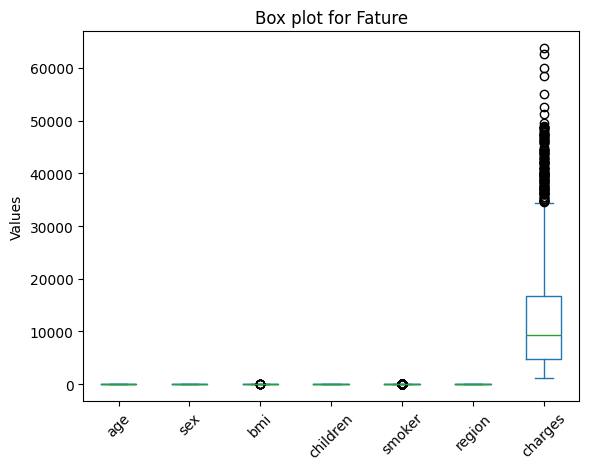

In [30]:
# Box plots
plt.figure(figsize=(6,6))
data.plot(kind='box')
plt.title('Box plot for Fature')
plt.ylabel('Values')
plt.xticks(rotation=45) 
plt.grid(False)
plt.show()

<Axes: ylabel='charges'>

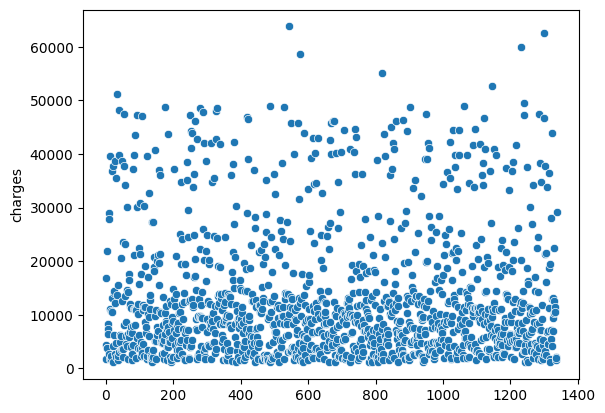

In [31]:
sns.scatterplot(data['charges'])

<Axes: ylabel='bmi'>

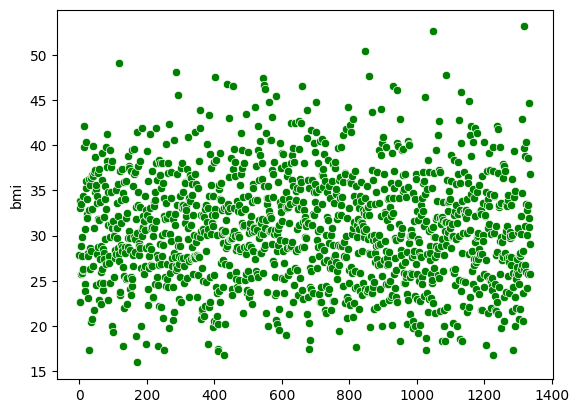

In [32]:
sns.scatterplot(data['bmi'],color='green')

<Axes: ylabel='age'>

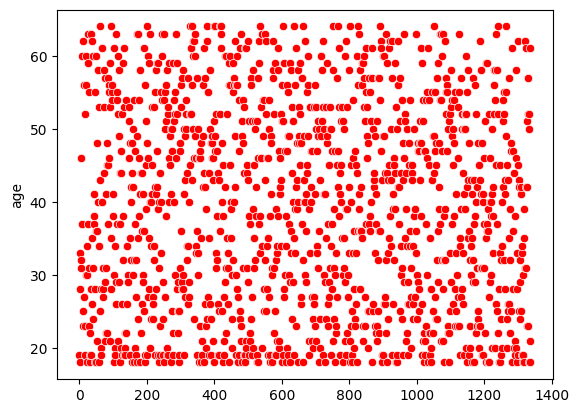

In [33]:
sns.scatterplot(data['age'],color='red')

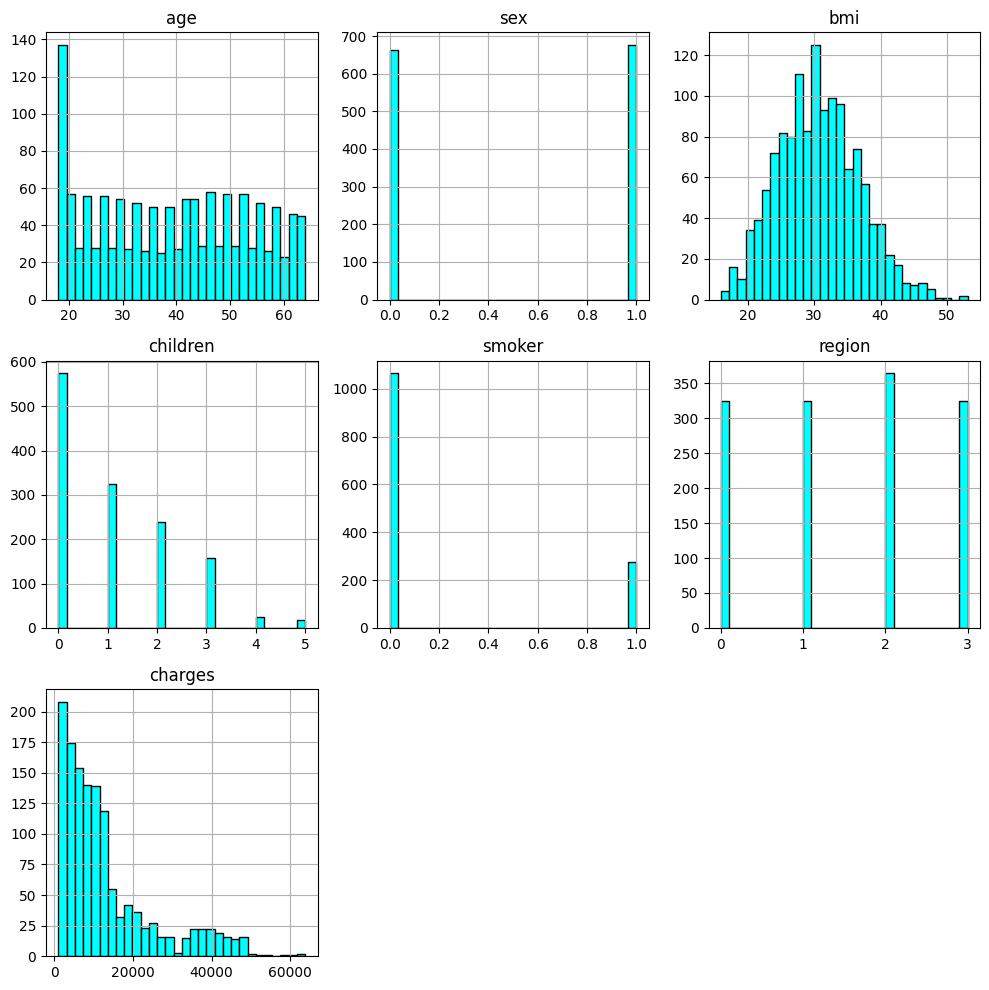

In [34]:
# Create histograms for all columns in the DataFrame
data.hist(figsize=(10, 10), bins=30, color='cyan', edgecolor='black')
plt.tight_layout()  # Adjust layout to prevent overlap of subplots
plt.show()

In [35]:
from scipy import stats
zscore = np.abs(stats.zscore(data))
threshold = 3
print(np.where(zscore > threshold))

(array([  32,   34,   71,  116,  166,  413,  425,  438,  543,  568,  577,
        640,  819,  847,  877,  932,  937,  969,  984, 1047, 1085, 1116,
       1130, 1146, 1230, 1245, 1272, 1300, 1317], dtype=int64), array([3, 6, 3, 2, 3, 3, 3, 3, 6, 3, 6, 3, 6, 2, 3, 3, 3, 3, 3, 2, 3, 3,
       3, 6, 6, 3, 3, 6, 2], dtype=int64))


In [36]:
data.shape

(1338, 7)

In [37]:
data1 = data.loc[(zscore < 3).all(axis=1)]

In [38]:
data1.shape

(1309, 7)

<Figure size 1600x1400 with 0 Axes>

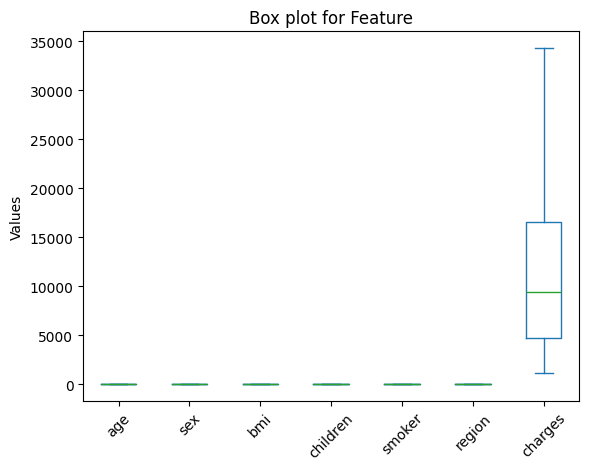

In [39]:
plt.figure(figsize=(16,14))
data1.plot(kind='box', showfliers=False)  # Set showfliers=False to exclude outliers
plt.title('Box plot for Feature')
plt.ylabel('Values')
plt.xticks(rotation=45) 
plt.grid(False)
plt.show()


In [40]:
X = data1.drop(['charges'], axis=1)  # Assuming 'quality' column is not needed as a feature
Y = data1['charges']

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train.shape,Y_train.shape , X_test.shape,Y_test.shape

((1047, 6), (1047,), (262, 6), (262,))

In [42]:
from sklearn.feature_selection import SelectKBest, f_regression

# Select top k features using F-statistic
k = 6  # Number of top features to select
selector = SelectKBest(score_func=f_regression, k=k)
X_train_selected = selector.fit_transform(X_train, Y_train)
X_test_selected = selector.transform(X_test)

In [43]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [44]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

In [45]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [46]:
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1309, dtype: float64

Linear Regression model

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create a Linear Regression model
lm = LinearRegression()

# Fit the model to the training data
lm.fit(X_train, Y_train)

# Calculate R-squared score on training data
train_r2 = lm.score(X_train, Y_train)
print("Training R-squared:", train_r2)

# Calculate R-squared score on test data
test_r2 = lm.score(X_test, Y_test)
print("Test R-squared:", test_r2)

# Make predictions
pred = lm.predict(X_test)

# Calculate R-squared score using r2_score function
r2 = r2_score(Y_test, pred)
print("R-squared:", r2)

Training R-squared: 0.7466293537134443
Test R-squared: 0.7783539090730872
R-squared: 0.7783539090730872


DT Regressor 

In [48]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the parameter grid for grid search
param_grid = {
    'criterion': ['friedman_mse', 'mse', 'mae'],  # Add valid criterion options here
    'max_depth': [3, 5, 5, None],
    'splitter': ['best', 'random']
}

# Create a decision tree regressor object
tree_regressor = DecisionTreeRegressor()

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=tree_regressor, param_grid=param_grid, cv=50)

# Assuming X_train and Y_train are your training data
# Fit the GridSearchCV object
grid_search.fit(X_train, Y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best estimator to predict on test data
Y_pred = grid_search.best_estimator_.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

print('Socre: ',grid_search.score(X_train,Y_train))
print('MSE  :',mean_squared_error(Y_test,Y_pred))
print('RMSE :',np.sqrt(mean_squared_error(Y_test,Y_pred)))
print('R2   :',r2_score(Y_pred,Y_test))

Best Parameters: {'criterion': 'friedman_mse', 'max_depth': 3, 'splitter': 'best'}
Socre:  0.8498461130508986
MSE  : 16772328.949888833
RMSE : 4095.4033928160034
R2   : 0.8636527619834936


Lasso Regression

In [49]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

ls = Lasso(alpha=0.000001)

ls.fit(X_train, Y_train)
predls = ls.predict(X_test)
print('Score: ', ls.score(X_train, Y_train))
print('MSE  :', mean_squared_error(Y_test, predls))
print('RMSE :', np.sqrt(mean_squared_error(Y_test, predls)))
print('R2   :', r2_score(predls, Y_test))

Score:  0.7466293537134443
MSE  : 30496851.749979652
RMSE : 5522.395472073659
R2   : 0.7131499980655174


Ridge Regression

In [50]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rd = Ridge(alpha=0.00001)

rd.fit(X_train, Y_train)
predrd = rd.predict(X_test)
print('Score: ', rd.score(X_train, Y_train))
print('MSE  :', mean_squared_error(Y_test, predrd))
print('RMSE :', np.sqrt(mean_squared_error(Y_test, predrd)))
print('R2   :', r2_score(predrd, Y_test))

Score:  0.7466293537134421
MSE  : 30496851.828351997
RMSE : 5522.395479169524
R2   : 0.7131499673900372


Random ForestRegression 

In [51]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=100, random_state=0) # n_estimators = 100 which is the number of trees.
rf_reg.fit(X_train, Y_train)
pred_rf = rf_reg.predict(X_test)

print('Score:', rf_reg.score(X_train, Y_train))
print('RMSE :', np.sqrt(mean_squared_error(Y_test, pred_rf)))
print('R2   :', r2_score(Y_test, pred_rf))

Score: 0.9737198055657719
RMSE : 4297.944806617568
R2   : 0.8657461540269717


Xgboost Model

In [52]:
import xgboost as xgb

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
random_seed = 0  # due to this Model performance is stable 

import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
random_seed = 0  # Due to this, model performance is stable 

# Convert the data to DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=Y_train)
dtest = xgb.DMatrix(X_test, label=Y_test)

# Define XGBoost parameters
params = {
    'objective': 'reg:squarederror',  # for regression tasks
    'eval_metric': 'rmse',  # root mean squared error
    'max_depth': 3,
    'learning_rate': 0.04,
    'random_state': random_seed,
    'n_estimators': 100,
    'min_child_weight': 1,
}

# Train the XGBoost model
model1 = xgb.train(params, dtrain, num_boost_round=100)

# Make predictions on the test set
pred_xgb = model1.predict(dtest)

# Make predictions on the training set
pred_train = model1.predict(dtrain)

# Compute training score manually
train_score = r2_score(Y_train, pred_train)

# Evaluate the model
print('Training Score:', train_score)  # Printing training score
print('RMSE:', np.sqrt(mean_squared_error(Y_test, pred_xgb)))
print('R2-Squared:', r2_score(Y_test, pred_xgb))

ModuleNotFoundError: No module named 'xgboost'

All Model Metrics 

In [ ]:
import pandas as pd

# Initialize lists to store results
model_names = []
scores = []
mse_values = []
rmse_values = []
r2_values = []

# Train and evaluate each model
for model in Model_list:
    model.fit(X_train, Y_train)
    if isinstance(model, xgb.Booster):
        predm = model.predict(dtest)
    else:
        predm = model.predict(X_test)
    
    model_names.append(model.__class__.__name__)
    scores.append(model.score(X_train, Y_train))
    mse_values.append(mean_squared_error(Y_test, predm))
    rmse_values.append(np.sqrt(mean_squared_error(Y_test, predm)))
    r2_values.append(r2_score(Y_test, predm))

# Create a dictionary with the results
results_dict = {
    'Model': model_names,
    'Score': scores,
    'MSE': mse_values,
    'RMSE': rmse_values,
    'R2': r2_values
}

# Create DataFrame from the dictionary
results_df = pd.DataFrame(results_dict)

# Display the DataFrame
print(results_df)

Model Testing 

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor

def pred(test_value, model):
    test_value_reshaped = test_value.reshape(1, -1)
    prediction = model.predict(test_value_reshaped)
    return prediction

#test_value = np.array([19,9,27.900,0,1,3])
test_value = np.array([18,0,36.850,0,0,3])
predictions = pred(test_value, rf_reg)
print(predictions)